# Algoritmo Genético: Transporte de Mercadorias
Link do Projeto no Github: https://github.com/juliomrodrigues/Otimizacao_de_Espaco    
Principais Bibliotecas usadas:
- mlrose : https://mlrose.readthedocs.io/en/stable/
- matplotlib : https://matplotlib.org/

In [15]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import matplotlib.pyplot as plt

# Cadastrando produtos
produtos = [('Refrigerador A', 0.751, 999.90),
         ('Celular', 0.0000899, 2911.12),
         ('TV 55', 0.400, 4346.99),
         ('TV 50', 0.290, 3999.90),
         ('TV 42', 0.200, 2999.00),
         ('Notebook A', 0.00350, 2499.90),
         ('Ventilador', 0.496, 199.90),
         ('Microondas A', 0.0424, 308.66),
         ('Microondas B', 0.0544, 429.90),
         ('Microondas C', 0.0319, 299.29),
         ('Refrigerador B', 0.635, 849.00),
         ('Refrigerador C', 0.870, 1199.89),
         ('Notebook B', 0.498, 1999.90),
         ('Notebook C', 0.527, 3999.00)]

# Total de espaço disponivel no caminhão em m³
espaco_disponivel = 3

def imprimir_solucao(solucao):
    """Função que percorre a lista de produtos do caminhão e os exibe, 
    juntamente com seus respectivos preços"""
    for i in range(len(solucao)):
        if solucao[i] == 1:
            print('%s - %s' % (produtos[i][0], produtos[i][2]))
            
def fitness_function(solucao):
    """Essa função será passado para o otimizador calculando o custo acumulado dentro do caminhão.
    Caso o espaço dos produtos ultrapsse o do caminhão, a função retorna 1, indicando um erro"""
    custo = 0
    soma_espaco = 0
    for i in range(len(solucao)):
        if solucao[i] == 1:
            custo += produtos[i][2]
            soma_espaco += produtos[i][1]
    if soma_espaco > espaco_disponivel:
        custo = 1
    return custo

# Criando o algoritmo genético

In [16]:
fitness = mlrose.CustomFitness(fitness_function)
problema = mlrose.DiscreteOpt(length=14, fitness_fn=fitness, maximize=True, max_val=2)
melhor_solucao, melhor_custo, curva = mlrose.genetic_alg(problema, pop_size=500, mutation_prob=0.2, curve=True)
geracoes = np.arange(1,len(curva)+1,1) # contando gerações passadas a partir do tamanho da curva

# Função gerar_grafico()
Criando uma função para gerar gráficos automaticamente.

In [17]:
def gerar_grafico(x, y, legend=[''],figsize=(16,5), save_fig=False):
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(figsize))
    plt.style.use('default')

    if legend != '':
        plt.plot(x, y, linewidth=3, linestyle='solid', label=legend)
        plt.legend()
    else:
        plt.plot(x, y, linewidth=3, linestyle='solid')

    plt.title('Gerações X Valor')
    plt.grid(True)
    
    if save_fig:
        plt.savefig('grafico_1')
    
    plt.show()
    return 

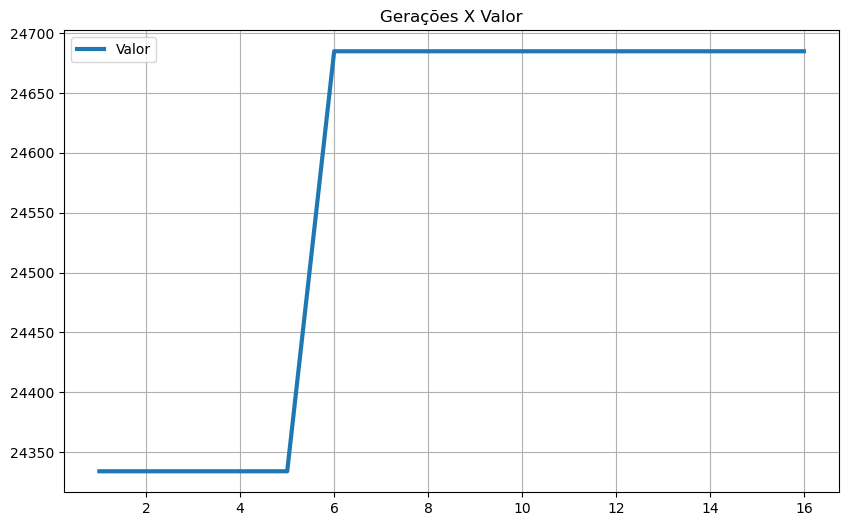

In [18]:
gerar_grafico(geracoes, curva, 'Valor', figsize=(10,6), save_fig=True)

In [19]:
imprimir_solucao(melhor_solucao)

Celular - 2911.12
TV 55 - 4346.99
TV 50 - 3999.9
TV 42 - 2999.0
Notebook A - 2499.9
Microondas B - 429.9
Microondas C - 299.29
Refrigerador C - 1199.89
Notebook B - 1999.9
Notebook C - 3999.0
